In [34]:
from tensorflow import keras
keras.__version__

'2.2.4-tf'

In [35]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
len(train_labels)

60000

In [38]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [39]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [40]:
import matplotlib.pyplot as plt

In [41]:
sample = train_images[301].reshape(28,28)

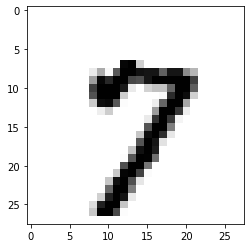

In [42]:
plt.imshow(sample,cmap=plt.cm.binary)

In [43]:
test_images.shape

(10000, 28, 28)

In [44]:
len(test_labels)

10000

In [45]:
test_labels[3]

0

In [46]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [47]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [48]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [49]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [50]:
network.fit(train_images, train_labels, epochs=5, batch_size=64)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2183 - accuracy: 0.9355
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0924 - accuracy: 0.9727
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0619 - accuracy: 0.9819
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0466 - accuracy: 0.9861
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0357 - accuracy: 0.9893


In [51]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [52]:
print('test_acc:', test_acc)

test_acc: 0.9786
